<a href="https://colab.research.google.com/github/rhlin2024/group_template/blob/main/FinalProject_groupXXX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COGS 118B - Final Project

#Customer Segmentation with Various Clustering Algorithms

## Group members

- Francisco Downey
- Keean Albao
- Richard Lin

# Abstract
The goal of our project is to segment customers into groups so that companies are able to market to these groups in order to retain customers and increase revenue. The data at hand represents state wide customers and the detailed description of their purchase at a particular season. With the data, the project looks to utilize K-Means Clustering, Gaussian Mixture Models, and DBSCAN algorithms as a means to group customers. By running the data using these clustering algorithms, we should have a good sense of how customers should be grouped and how companies should market towards these groups. To ensure accuracy of our clusters, we will use Silhouette Analysis and Adjusted Rand Index.

# Background
Online retailers and e-commerce are becoming increasingly relevant and convenient within recent years. Some of the most popular of these online stores include Amazon, eBay, Kroger, and Etsy. People use online shopping for many of their necessary and impulse purchases, including groceries, household items, clothes, and so on. Even though physical store visits and sales for many product categories are still higher than those of online retailers, the number of online shoppers and e-commerce revenue consistently grows every year</a>[<sup>[1]</sup>](#radunote).
  
When it comes to online shopping, it is crucial for businesses to understand consumer behavior and shopping habits in order to optimize their marketing strategies. There are many factors that influence consumer behavior. Some of these include personal factors (demographics such as age, gender, and location), psychological factors (consumer responses to marketing messages), and social factors (family dynamics, peer influence, social media presence, and income levels)</a>[<sup>[2]</sup>](#statistanote).

One study </a>[<sup>[3]</sup>](#alzahraninote) tried to cluster customer behavior using DBSCAN and K-Means. This study worked in collaboration with a delivery company to understand behaviors and methods of consumers that use the company's services for. For their target features, they decided to use Number of Orders, Total amount paid by this buyer, Number of orders paid Cash, Number of Orders paid by Card, Number of orders paid using STCPay and Count of unique product categorical ordered. During their analysis, they used PCA to reduce the number of features before training their models. For the K-Means algorithm, they applied the elbow method and silhouette analysis. For the DBSCAN algorithm, they applied the elbow method again. Overall, with K-Means they conclude that customers in one cluster prefer to pay using STCPay rather than card or cash in the other clusters, and similarly with DBSCAN.

# Problem Statement

The problem at hand is that we want to determine what the different customer similarity groups are based on data containing consumer behaviors, demographics, and shopping habits (e.g. age, gender, item purchased, season, location, etc.), and how can businesses market their products towards these different groups in order to retain customers and increase revenue?


One potential solution to this problem is to use clustering algorithms like K-Means, GMM, and DBSCAN. These algorithms can group similar customers together based on their feature similarities, allowing businesses to identify distinct customer segments. Once segments are identified, businesses can tailor their marketing strategies to each segment's preferences and behaviors, leading to more effective targeting, higher customer satisfaction, and increased revenue.


Since our data will consist of both numerical (e.g. age, purchase amount) and categorical (e.g. gender, item purchased) values, we will need to use one-hot encoding in order to map the categorical values to numerical values. This will make our problem fully quantifiable. The problem is measurable because distinct clusters can be visualized and observed in order to determine which data points are closest to one another as well as what separates them. This can be evaluated using metrics such as silhouette analysis, elbow method, and adjusted rand index. Lastly, it is replicable because the process of segmenting customers and optimizing marketing strategies can be repeated using new data or in different contexts.

# Data

The dataset being used is from the following link<a name="sota"></a>[<sup>[3]</sup>](#sotanote). The dataset has 18 variables and 3900 observations. Each observation has age, gender, item purchased, category of the purchase, purchase amount, location, size of purchase, color of purchase, season in which purchase took place, review rating, subscription status, shipping type, if a discount or promo code was applied, previous purchases, payment method, and frequency of purchases. The critical values are age(integer), gender(Male or Female), category of purchase(string), purchase amount(integer representing dollar amount), location(string of state), size of purchase(S,M,L,XL), season(string of one of four possible seasons), and previous purchases(integer). There will be no cleaning necessary due to the fact that each variable follows the sam format for each observation


# Proposed Solution

We aim to solve this problem using K-Means Clustering, Gaussian Mixture Models, and DBSCAN. These clustering algorithms will allow us to create clusters that contain customers with similar demographics, behaviors, and spending habits. Then once we have our final clusters, we can use techniques such as centroid examination and visualizations in order to make analyses within each cluster regarding what businesses should do in order to tailor to these different groups.


For each algorithm, we plan to use Scikit-Learn's algorithms and fit them to the dataset in order to create our groups. This is an applicable solution since our data is not supervised (we don't have predefined labels for the different groups). These algorithms are also pretty flexible since we can determine the optimal number of clusters that best represent the data. Lastly, these algorithms are highly interpretable since the different clusters should clearly represent different groups.


Important to note is the abundance of categorical data within the dataset. To ensure that the clustering algorithms can still be used, one-hot encoding will be done in order to map the categorical data to numerical values.


When analyzing the clusters, since each cluster centroid represents the mean of all data points within that cluster, we can gain insights into the characteristics of customers in each cluster by analyzing the centroid values for each feature. For example, if one cluster has a high mean purchase amount and a relatively young age, one might label it as “Young High Spenders.” Additionally, we can create plots to visualize the clusters in order to identify patterns/trends that distinguish clusters from each other.


# Evaluation Metrics


In order to ensure the clustering is accurate, silhouette analysis will be conducted. For each data point the following equation will be followed: The data point's average distance from all data points in its cluster will be subtracted from the data point's average distance from all data points in the neighboring cluster. This value divided by the max of the aforementioned average distances will provide the silhouette coefficient. The desired coefficient will be as close to +1 as possible, representing highly dense clustering.

We will also be using Adjusted Rand Index as a scoring metric, which will be used to help compare different clustering results and provide insight into the effectiveness of clustering algorithms. We intend to receive high ARI scores (0.5 - 1) because this suggests better agreement between clusterings.


# Results

### Subsection 1

You will likely have different subsections as you go through your report. For instance you might start with an analysis of the dataset/problem and from there you might be able to draw out the kinds of algorithms that are / aren't appropriate to tackle the solution.  Or something else completely if this isn't the way your project works.

### Subsection 2

Another likely section is if you are doing any feature selection through cross-validation or hand-design/validation of features/transformations of the data

### Subsection 3

Probably you need to describe the base model and demonstrate its performance.  Maybe you include a learning curve to show whether you have enough data to do train/validate/test split or have to go to k-folds or LOOCV or ???

### Subsection 4

Perhaps some exploration of the model selection (hyper-parameters) or algorithm selection task. Validation curves, plots showing the variability of perfromance across folds of the cross-validation, etc. If you're doing one, the outcome of the null hypothesis test or parsimony principle check to show how you are selecting the best model.

### Subsection 5

Maybe you do model selection again, but using a different kind of metric than before?



First we make necessary imports for our analysis and load our dataset. We take a look at the first couple rows.

## EDA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
# %pip install umap-learn;
# from umap import UMAP
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import adjusted_rand_score, silhouette_score, make_scorer
from sklearn.mixture import GaussianMixture


data = pd.read_csv("https://raw.githubusercontent.com/rhlin2024/group_template/main/shopping_behavior_updated.csv")
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


We take a look at the summary statistics.

In [ ]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


We plot histograms for our numerical variables to observe their distributions.

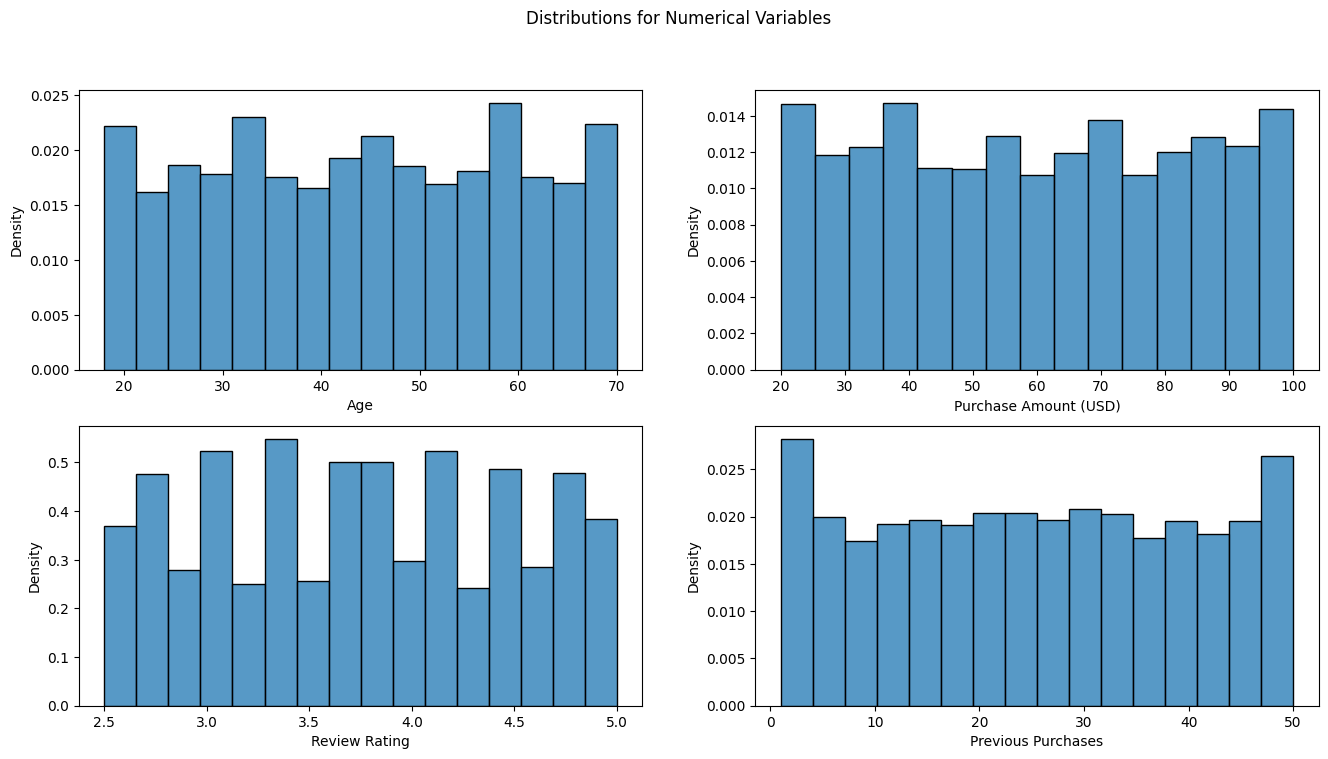

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
fig.suptitle("Distributions for Numerical Variables")
age_hist = sns.histplot(data, x='Age', stat='density', ax=axes[0, 0])
purchase_amount_hist = sns.histplot(data, x='Purchase Amount (USD)', stat='density', ax=axes[0, 1])
rating_hist = sns.histplot(data, x='Review Rating', stat='density', ax=axes[1, 0])
prev_purchases_hist = sns.histplot(data, x='Previous Purchases', stat='density', ax=axes[1, 1])

We also plot barcharts for our categorical variables to observe their counts.

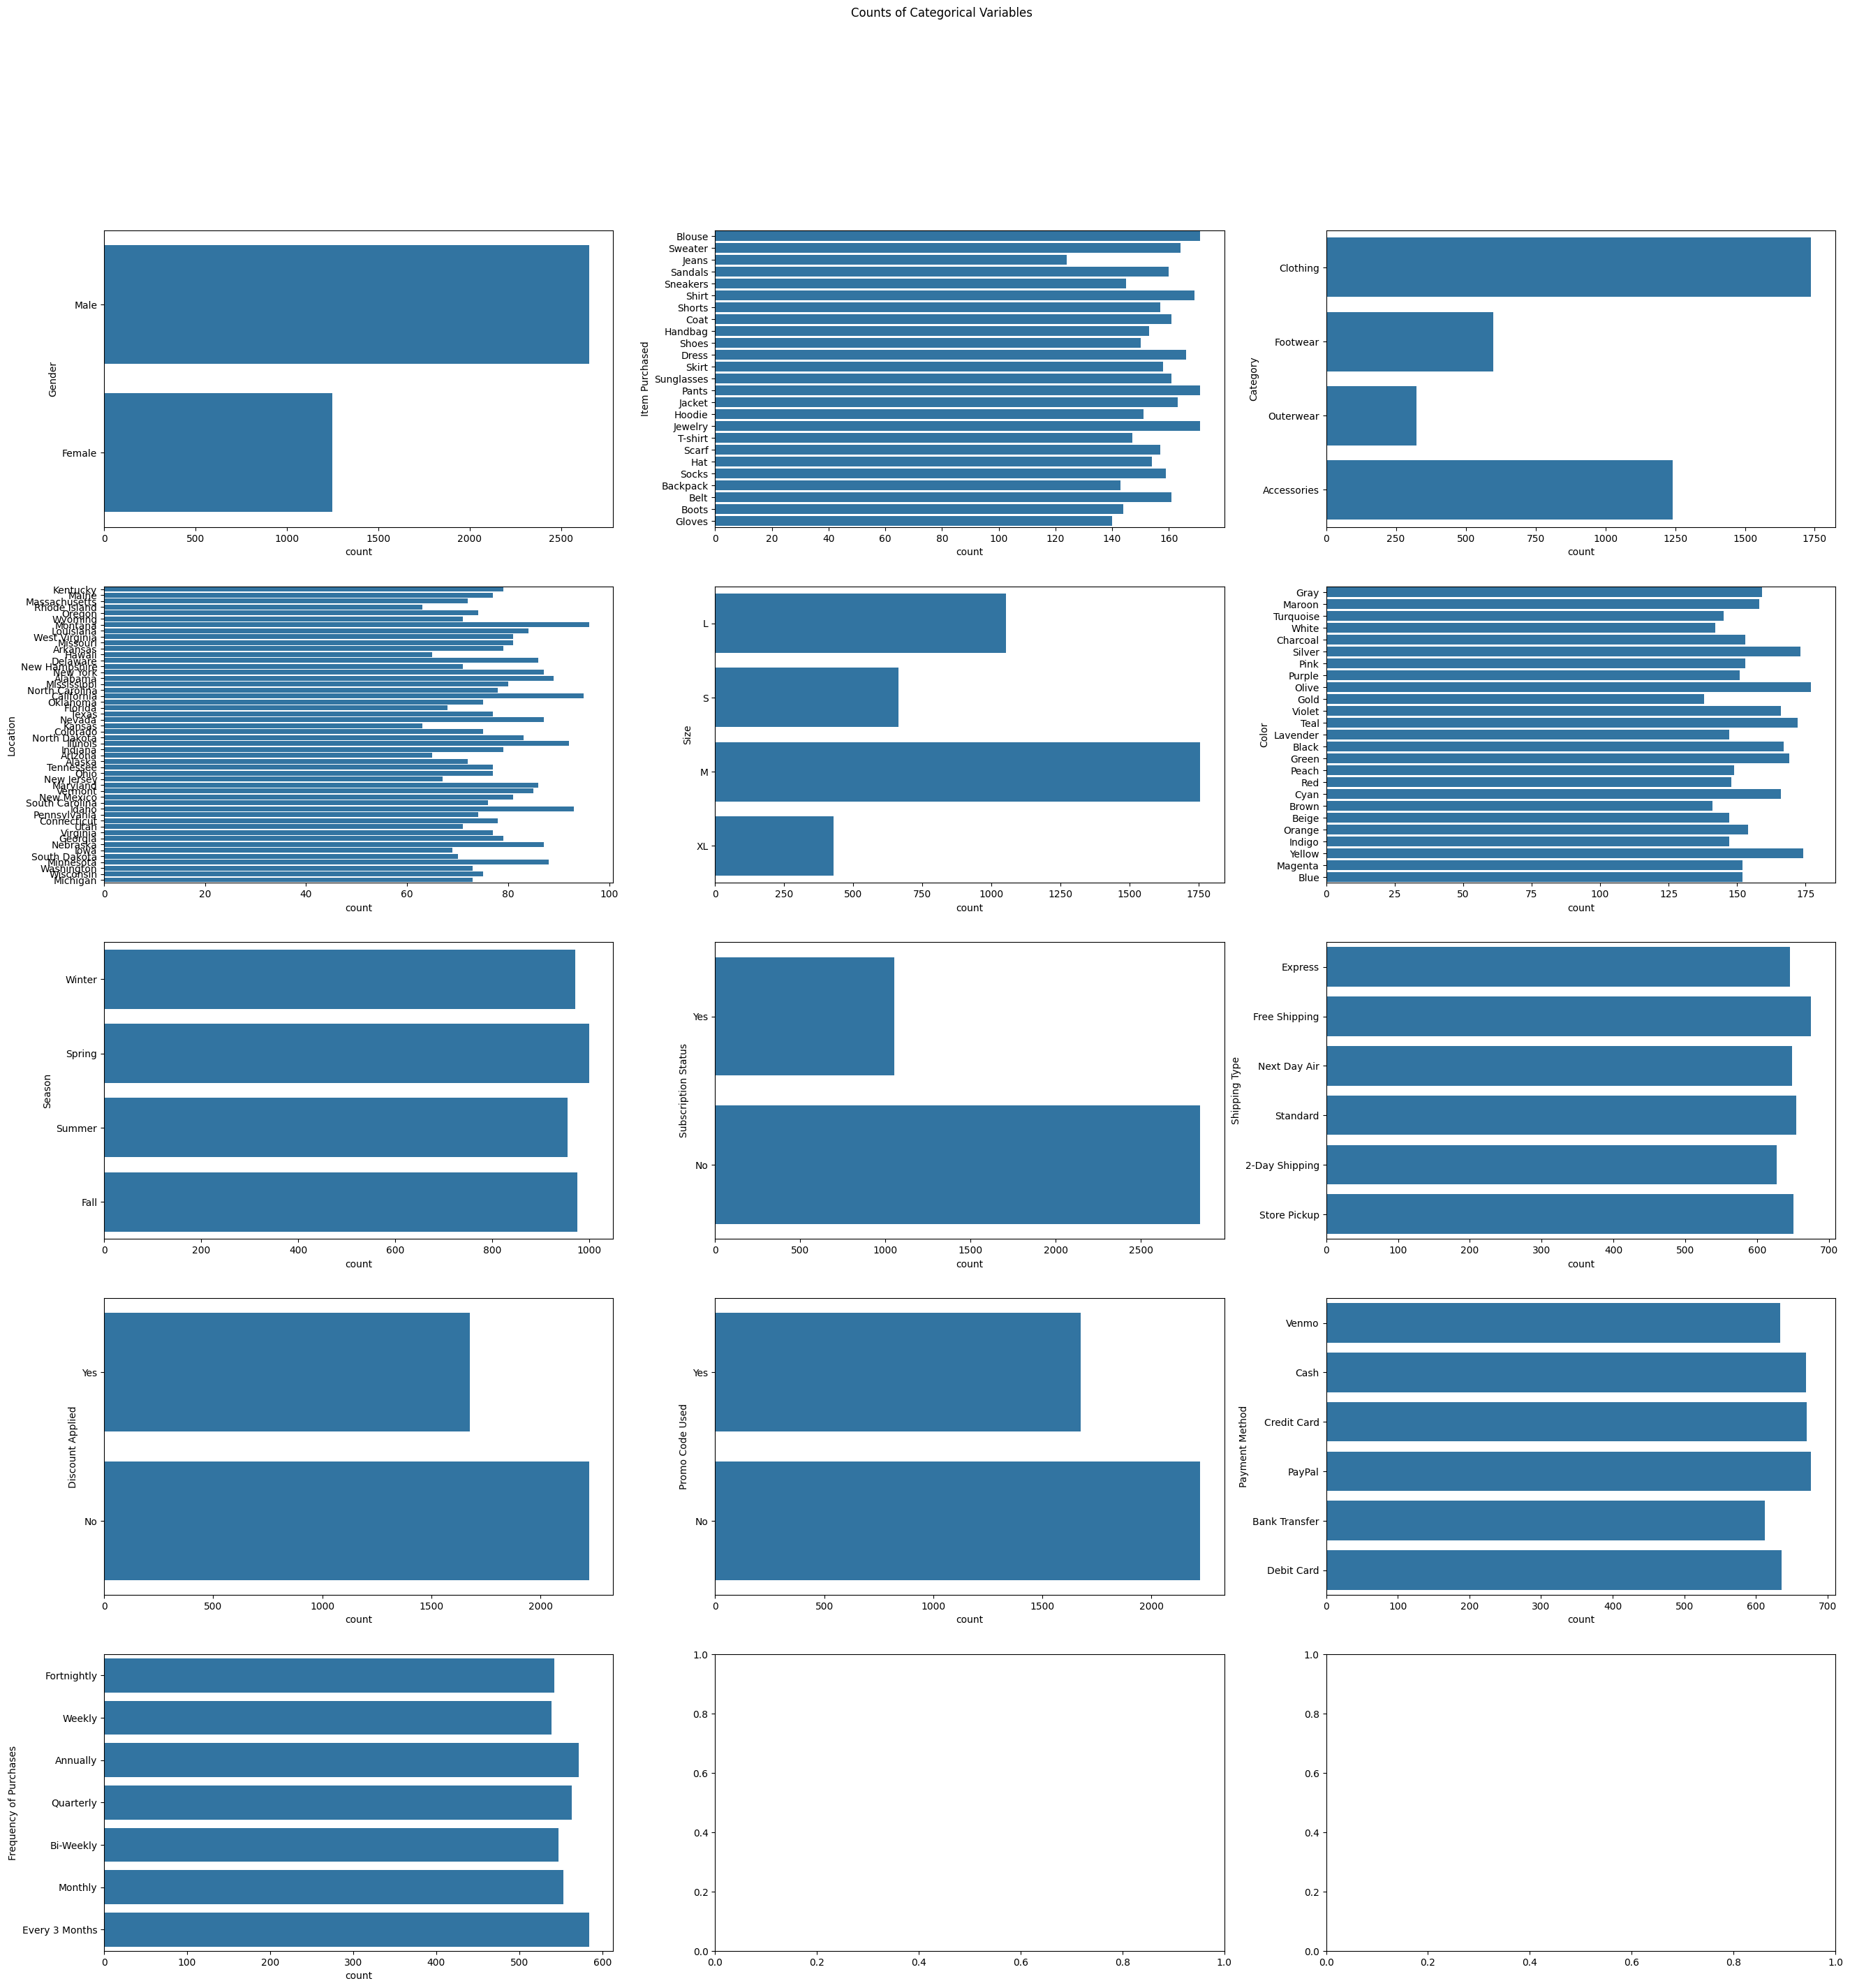

In [ ]:
fig, axes = plt.subplots(5, 3, figsize=(32, 32))
fig.suptitle("Counts of Categorical Variables")
gender_count = sns.countplot(data, y='Gender', ax=axes[0, 0])
item_count = sns.countplot(data, y='Item Purchased', ax=axes[0, 1])
cat_count = sns.countplot(data, y='Category', ax=axes[0, 2])
loc_count = sns.countplot(data, y='Location', ax=axes[1, 0])
size_count = sns.countplot(data, y='Size', ax=axes[1, 1])
col_count = sns.countplot(data, y='Color', ax=axes[1, 2])
season_count = sns.countplot(data, y='Season', ax=axes[2, 0])
sub_count = sns.countplot(data, y='Subscription Status', ax=axes[2, 1])
ship_count = sns.countplot(data, y='Shipping Type', ax=axes[2, 2])
discount_count = sns.countplot(data, y='Discount Applied', ax=axes[3, 0])
promo_count = sns.countplot(data, y='Promo Code Used', ax=axes[3, 1])
pay_count = sns.countplot(data, y='Payment Method', ax=axes[3, 2])
freq_count = sns.countplot(data, y='Frequency of Purchases', ax=axes[4, 0])

We notice several categorical variables have many distinct values such as Location, Color, and Item Purchased. Since we do not expect these to have a significant impact on customer behavior, we feel comfortable dropping these from our dataset as they will lead to problems later on with one-hot encoding. We also remove Customer ID from our dataset since it is not relevant to our analysis. Finally, we drop Gender, Category, and Payment Method since these will be the different target features that we will be segmenting by.

In [ ]:
gender_labels = data['Gender']
category_labels = data['Category']
pay_method_labels = data['Payment Method']

data = data.drop(columns=['Customer ID', 'Location', 'Color', 'Item Purchased', 'Gender', 'Category', 'Payment Method'])

Now, we preprocess our data by standardizing the numerical variables and one-hot encoding the categorical variables.

In [ ]:
scaler = StandardScaler()
onehot = OneHotEncoder()

to_scale = data.columns[(data.dtypes == int) | (data.dtypes == float)]
to_onehot = data.columns[data.dtypes == object]

scale_numerics = scaler.fit_transform(data[to_scale])
categories = onehot.fit_transform(data[to_onehot])

Take a look at our new preprocessed dataset.

In [ ]:
preproc = pd.DataFrame(scale_numerics, columns=scaler.get_feature_names_out())
preproc = preproc.join(pd.DataFrame(categories.toarray(), columns=onehot.get_feature_names_out(), index=preproc.index))
preproc.head()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Size_L,Size_M,Size_S,Size_XL,Season_Fall,Season_Spring,...,Discount Applied_Yes,Promo Code Used_No,Promo Code Used_Yes,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,0.718913,-0.285629,-0.907584,-0.785831,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-1.648629,0.178852,-0.907584,-1.616552,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.390088,0.558882,-0.907584,-0.162789,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.517099,1.276716,-0.349027,1.637107,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.061263,-0.454531,-1.466141,0.391025,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Take a look at the new summary statistics.

In [ ]:
preproc.describe()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Size_L,Size_M,Size_S,Size_XL,Season_Fall,Season_Spring,...,Discount Applied_Yes,Promo Code Used_No,Promo Code Used_Yes,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
count,3.900000e+03,3.900000e+03,3.900000e+03,3.900000e+03,3900.000000,3900.000000,3900.000000,3900.00000,3900.000000,3900.000000,...,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,-1.985876e-16,-1.166019e-16,4.463666e-16,7.287618e-17,0.270000,0.450000,0.170000,0.11000,0.250000,0.256154,...,0.430000,0.570000,0.430000,0.146667,0.140256,0.149744,0.138974,0.141795,0.144359,0.138205
std,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,0.444016,0.497558,0.375681,0.31293,0.433068,0.436564,...,0.495139,0.495139,0.495139,0.353819,0.347297,0.356866,0.345964,0.348884,0.351498,0.345159
min,-1.714394e+00,-1.679071e+00,-1.745419e+00,-1.685779e+00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.594483e-01,-8.767861e-01,-9.075836e-01,-8.550575e-01,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-4.502378e-03,9.950067e-03,-6.974802e-02,-2.433588e-02,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.504436e-01,8.966862e-01,9.077268e-01,8.756125e-01,1.000000,1.000000,0.000000,0.00000,0.250000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.705390e+00,1.698971e+00,1.745562e+00,1.706334e+00,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We visualize the data using PCA and observe that there appears to be some structure which looks promising for clustering algorithms.

<Axes: xlabel='pc1', ylabel='pc2'>

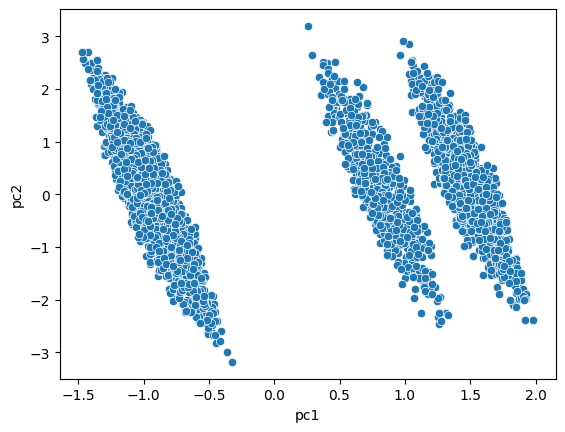

In [ ]:
pca_viz = PCA(n_components=2).fit_transform(preproc)
pca_viz_coords = pd.DataFrame(pca_viz, columns=['pc1', 'pc2'])
sns.scatterplot(data=pca_viz_coords, x='pc1', y='pc2')

# Analysis

We use PCA to reduce the dimensions of our data. We observe that 3 principal components capture more than 50% of the variance which is satisfactory for our purposes.

0.5020861105518425


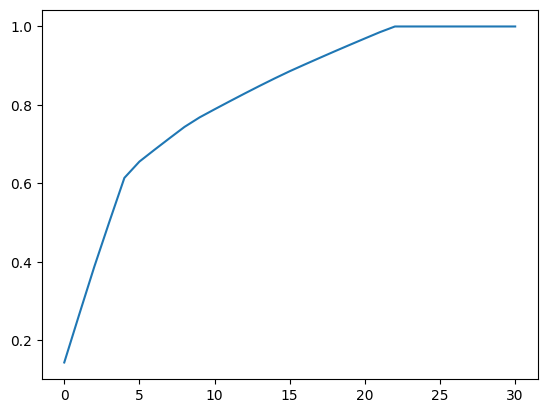

In [ ]:
pca = PCA()
dim_red = pca.fit_transform(preproc)
total_var_exp = np.cumsum(pca.explained_variance_ratio_)
plt.plot(total_var_exp)

print(total_var_exp[3])
best_num_pcs = 3

## K-Means

Here, we are will plot the Elbow Method to view the proper amount of clusters on a particular set of Principal Components

In [ ]:
costs = []
for k in range(1, 9):
    km = KMeans(n_clusters=k)
    labels = km.fit(pca_viz_coords.values)
    costs.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Distortion Measures of each $k$ values')

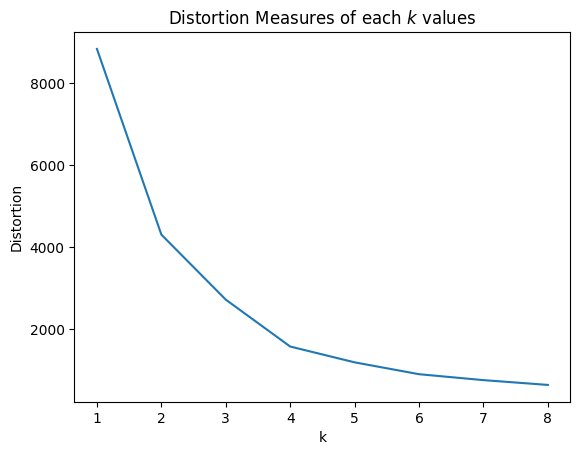

In [ ]:
plt.plot(range(1, 9), costs)
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("Distortion Measures of each $k$ values")

From the elbow method, the correct amount of clusters is 4. By using this amount of clusters, we keep the model less complex while still preserving the needed variance.

Another Method that can work is using the Silhouette Analysis. The following code is from SciKit learn https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py and can be used to visually see the correct number of clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.5262441121565922


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.5049645432053697


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.5190303704819129


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.49817916828163517


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.47790678792808516


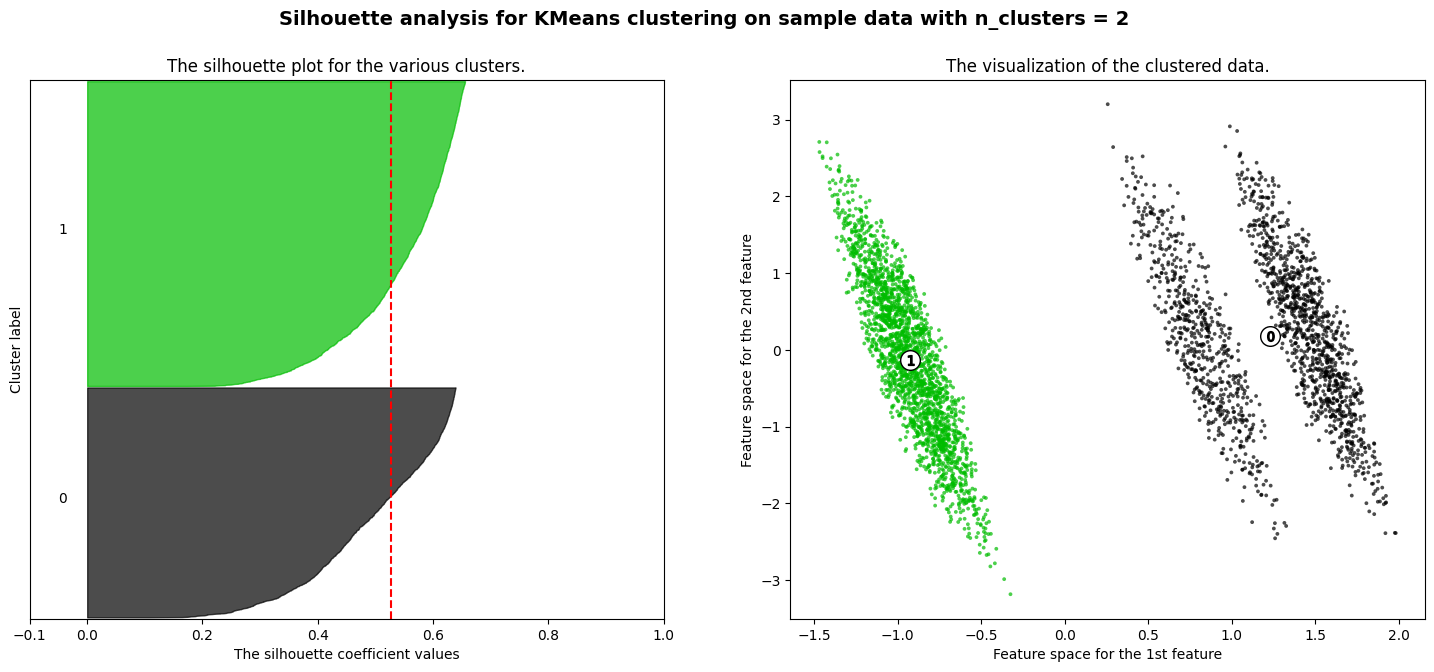

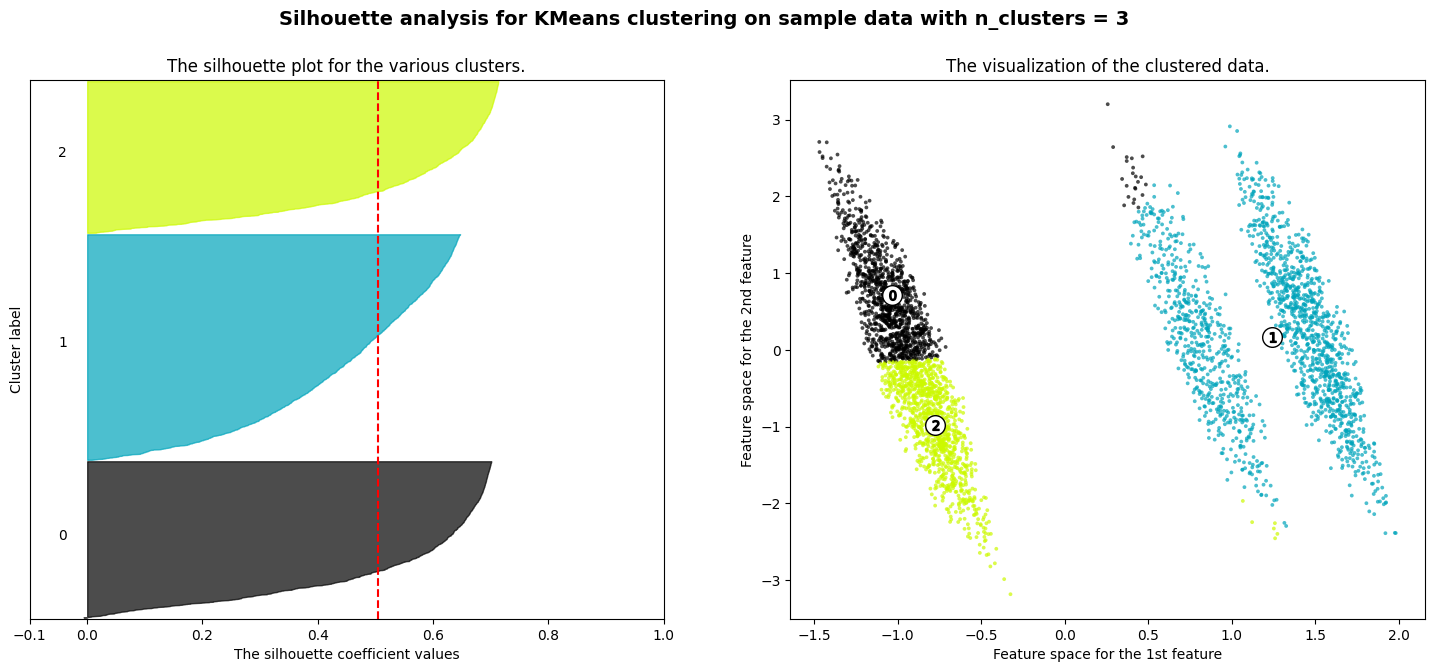

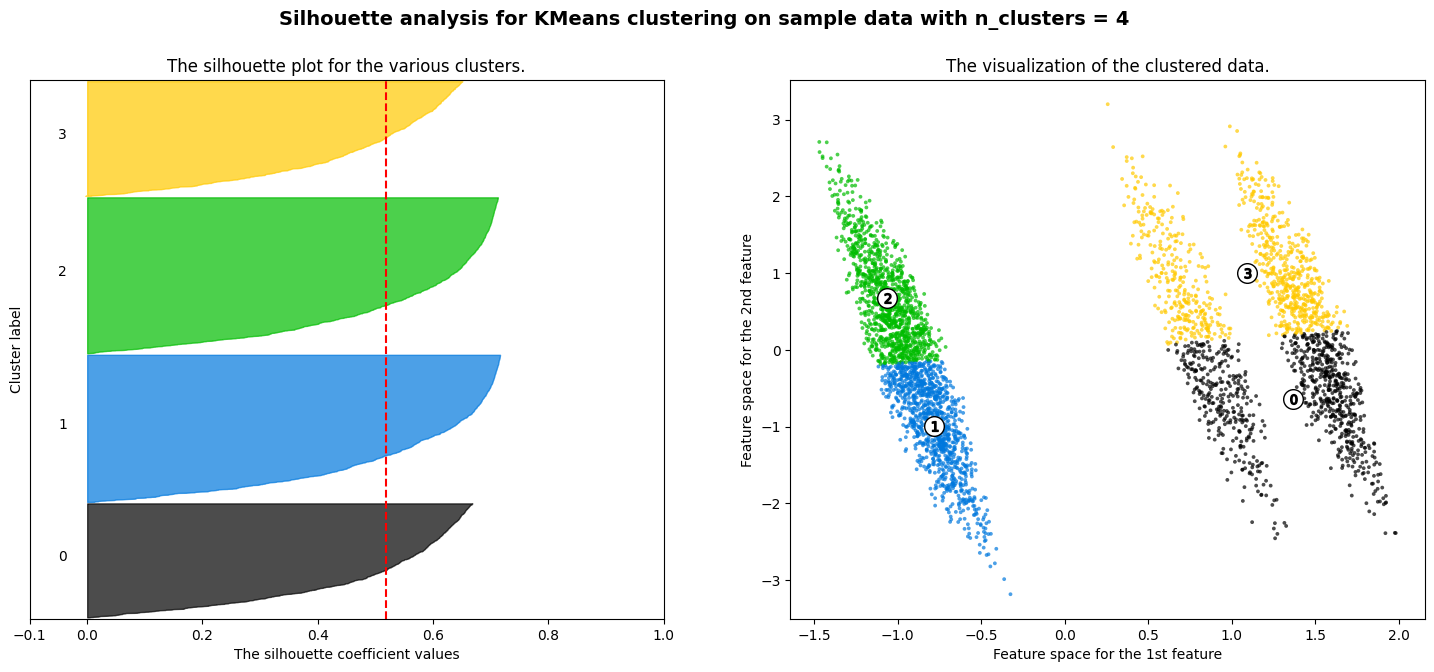

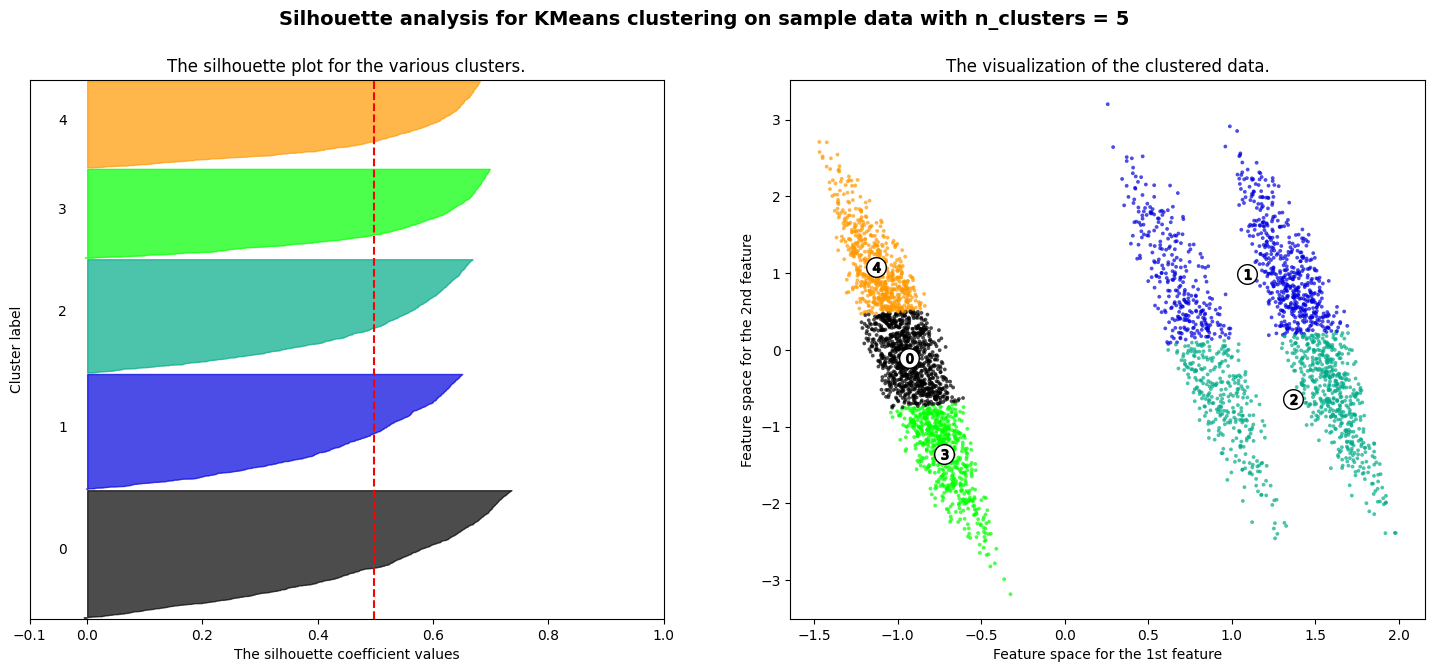

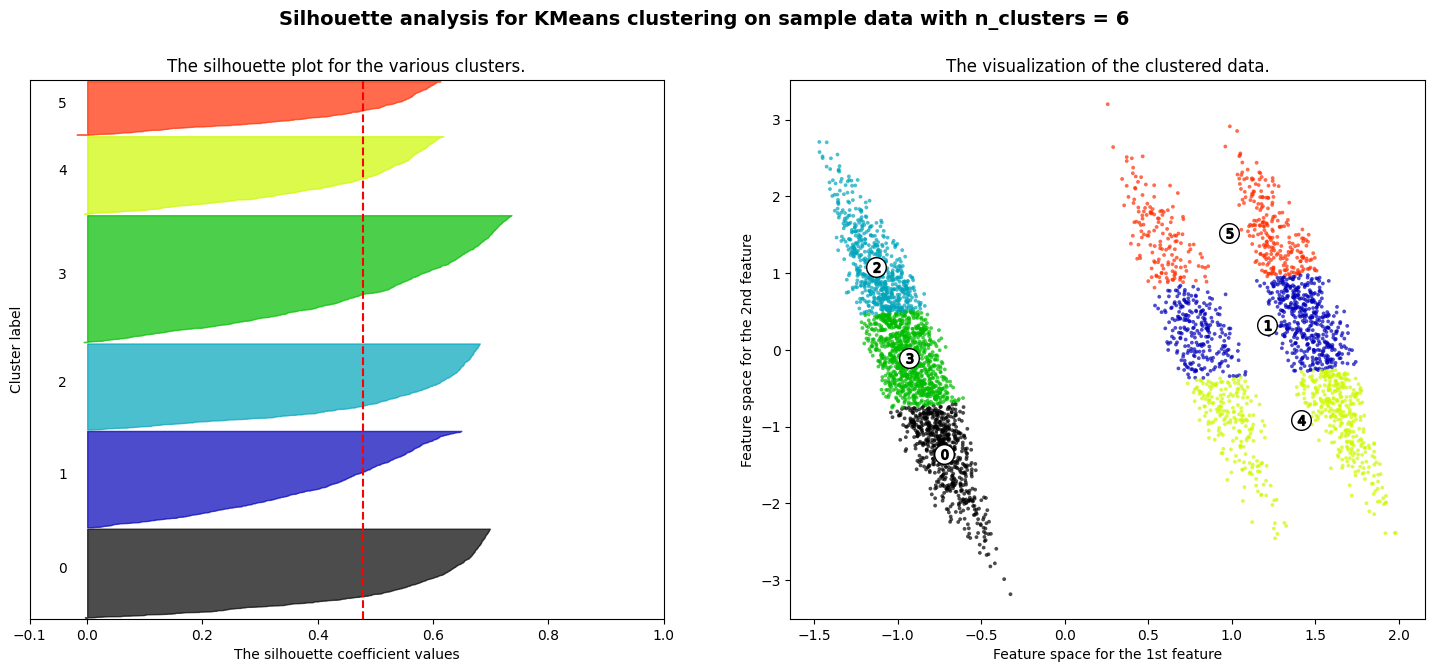

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

X = pca_viz_coords.values

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

From the following silhouettes, it can be seen that 4 or 5 clusters can be the best choice. This is done by looking at size and shape of the silhouettes.

Immediately, the clusters are seen to oppose the assumptions required for KMeans to be a good choice to model the data. The groups projected onto the two principal components are not spherical. They are anisotropically distributed. To further prove that KMeans is not the correct model, plotting the amounts of each cluster can provide a quantitative way to prove that the size of clusters vary and thus evidence against KMeans.

In [ ]:
km = KMeans(n_clusters=4)
clust_labels = km.fit_predict(preproc)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


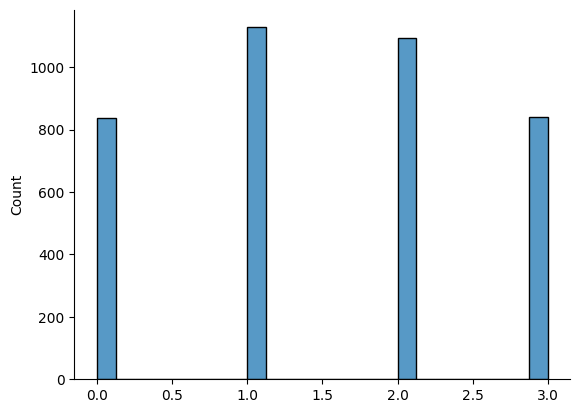

In [ ]:
sns.histplot(clust_labels)
sns.despine();

Here, it can be seen that some clusters has a fair amount of more data points than other clusters.

Regardless, a pipeline will be created to see if changing the method of centroid initiatiation changes the similarity between the actual and predicted values.

In [ ]:
init_samples = ['k-means++','random']

In [ ]:
pipe_kmeans = Pipeline([('pca', PCA(n_components=best_num_pcs)), ('clustering', KMeans(n_init=10))])

param_grid = {
    'clustering__init': init_samples,
}

grid = GridSearchCV(
    estimator=pipe_kmeans,
    param_grid=param_grid,
    scoring="adjusted_rand_score",
    verbose=2,
    cv=3
)

In [ ]:
grid.fit(preproc, gender_labels)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END .........................clustering__init=k-means++; total time=   0.2s
[CV] END .........................clustering__init=k-means++; total time=   0.2s
[CV] END .........................clustering__init=k-means++; total time=   0.2s
[CV] END ............................clustering__init=random; total time=   0.2s
[CV] END ............................clustering__init=random; total time=   0.2s
[CV] END ............................clustering__init=random; total time=   0.2s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', PCA(n_components=3)),
                                       ('clustering', KMeans(n_init=10))]),
             param_grid={'clustering__init': ['k-means++', 'random']},
             scoring='adjusted_rand_score', verbose=2)

In [ ]:
results = pd.DataFrame(grid.cv_results_['params'])
results['score'] = grid.cv_results_['mean_test_score']
cols = results.columns.to_series().str.split('__').apply(lambda x: x[-1])
results.columns = cols
#sns.heatmap(results.pivot_table('init','score'), annot=True, cmap="crest", fmt='5.4f')
results

,init,score
0,k-means++,-0.000310
1,random,-0.000372


In [ ]:
grid.fit(preproc, category_labels)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END .........................clustering__init=k-means++; total time=   0.2s
[CV] END .........................clustering__init=k-means++; total time=   0.2s
[CV] END .........................clustering__init=k-means++; total time=   0.2s
[CV] END ............................clustering__init=random; total time=   0.2s
[CV] END ............................clustering__init=random; total time=   0.2s
[CV] END ............................clustering__init=random; total time=   0.2s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', PCA(n_components=3)),
                                       ('clustering', KMeans(n_init=10))]),
             param_grid={'clustering__init': ['k-means++', 'random']},
             scoring='adjusted_rand_score', verbose=2)

In [ ]:
results = pd.DataFrame(grid.cv_results_['params'])
results['score'] = grid.cv_results_['mean_test_score']
cols = results.columns.to_series().str.split('__').apply(lambda x: x[-1])
results.columns = cols
#sns.heatmap(results.pivot_table('n_clusters','score'), annot=True, cmap="crest", fmt='5.4f')
results

,init,score
0,k-means++,0.000765
1,random,0.000406


In [ ]:
grid.fit(preproc, pay_method_labels)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END .........................clustering__init=k-means++; total time=   0.2s
[CV] END .........................clustering__init=k-means++; total time=   0.2s
[CV] END .........................clustering__init=k-means++; total time=   0.3s
[CV] END ............................clustering__init=random; total time=   0.2s
[CV] END ............................clustering__init=random; total time=   0.2s
[CV] END ............................clustering__init=random; total time=   0.2s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', PCA(n_components=3)),
                                       ('clustering', KMeans(n_init=10))]),
             param_grid={'clustering__init': ['k-means++', 'random']},
             scoring='adjusted_rand_score', verbose=2)

In [ ]:
results = pd.DataFrame(grid.cv_results_['params'])
results['score'] = grid.cv_results_['mean_test_score']
cols = results.columns.to_series().str.split('__').apply(lambda x: x[-1])
results.columns = cols
#sns.heatmap(results.pivot_table('n_clusters','score'), annot=True, cmap="crest", fmt='5.4f')
results

,init,score
0,k-means++,0.000385
1,random,0.000375


From the pipeline, it is found that using k-means++ is some measure better than using random.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


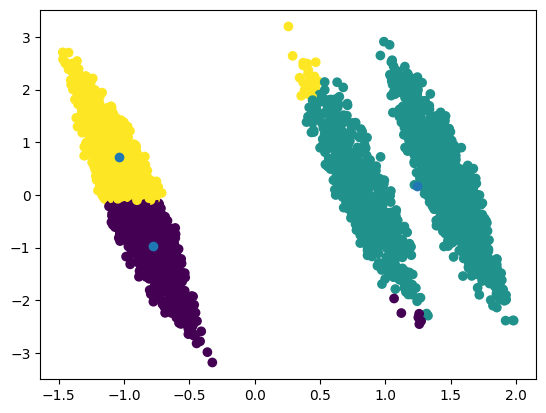

In [ ]:
km = KMeans(n_clusters=3)
labels = km.fit_predict(pca_viz_coords)
centroids = km.cluster_centers_


plt.scatter(pca_viz[:,0], pca_viz[:,1], c = labels)
plt.scatter(centroids[:,0], centroids[:,1])

As shown, KMeans clearly does not work well to capture the clear clusters that can be seen visually. The clusters shape differs from what is needed for KMeans to work.

## DBSCAN

We use the elbow method to determine good choices for hyperparameters of DBSCAN.

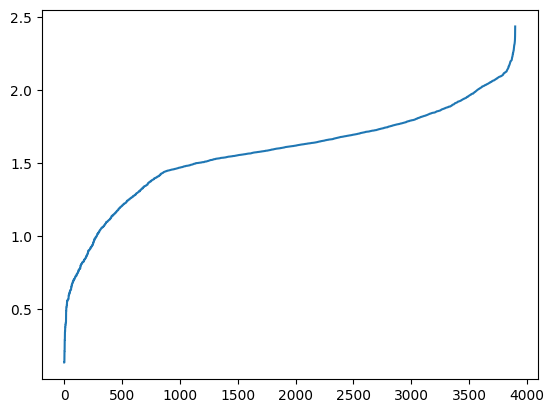

In [ ]:
neighbors = NearestNeighbors(n_neighbors=15)
neighbors.fit(preproc)
distances, indices = neighbors.kneighbors(preproc)
distances = np.sort(distances, axis=0)[:,1]
plt.plot(distances)

Upon zooming in, we notice good values for epsilon seem to range from 2.0 to 2.5.

(2.0, 2.5)

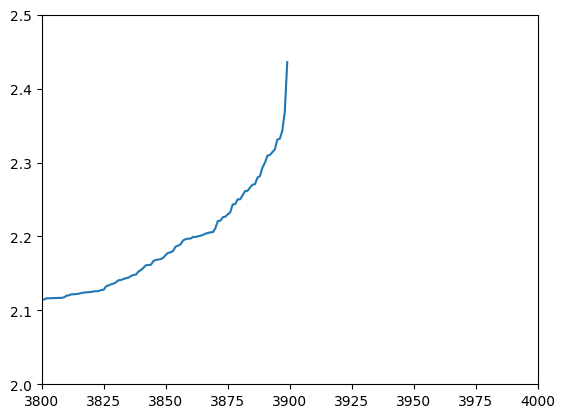

In [ ]:
plt.plot(distances)
plt.xlim(left=3800, right=4000)
plt.ylim(top=2.5, bottom=2.0)

We use pipelines and grid search to find the best combination of parameters using ARI as the scoring metric.

In [ ]:
min_samples_vals = [5, 10, 20]
eps_vals = [0.5, 1.0, 1.5, 2.0, 2.5]

In [ ]:
pipe_dbscan = Pipeline([
    ('pca', PCA(n_components=best_num_pcs)),
    ('clustering', DBSCAN())
])

param_grid = {
    'clustering__min_samples': min_samples_vals,
    'clustering__eps': eps_vals
}

def ari_score(estimator, X, y):
  predictions = estimator.fit_predict(X)
  return adjusted_rand_score(y, predictions)

grid = GridSearchCV(
    estimator=pipe_dbscan,
    param_grid=param_grid,
    scoring=ari_score,
    verbose=2,
    cv=3
)

After many trials, we determine that clustering by gender yields the best results for DBSCAN. We hide the other results for better readability.

In [ ]:
grid.fit(preproc, gender_labels)
# grid.fit(preproc, category_labels)
# grid.fit(preproc, pay_method_labels)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] END .....clustering__eps=0.5, clustering__min_samples=5; total time=   0.2s
[CV] END .....clustering__eps=0.5, clustering__min_samples=5; total time=   0.2s
[CV] END .....clustering__eps=0.5, clustering__min_samples=5; total time=   0.2s
[CV] END ....clustering__eps=0.5, clustering__min_samples=10; total time=   0.2s
[CV] END ....clustering__eps=0.5, clustering__min_samples=10; total time=   0.2s
[CV] END ....clustering__eps=0.5, clustering__min_samples=10; total time=   0.2s
[CV] END ....clustering__eps=0.5, clustering__min_samples=20; total time=   0.1s
[CV] END ....clustering__eps=0.5, clustering__min_samples=20; total time=   0.1s
[CV] END ....clustering__eps=0.5, clustering__min_samples=20; total time=   0.2s
[CV] END .....clustering__eps=1.0, clustering__min_samples=5; total time=   0.3s
[CV] END .....clustering__eps=1.0, clustering__min_samples=5; total time=   0.2s
[CV] END .....clustering__eps=1.0, clustering__m

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', PCA(n_components=3)),
                                       ('clustering', DBSCAN())]),
             param_grid={'clustering__eps': [0.5, 1.0, 1.5, 2.0, 2.5],
                         'clustering__min_samples': [5, 10, 20]},
             scoring=<function ari_score at 0x7e7a51c977f0>, verbose=2)

In [ ]:
# results = pd.DataFrame(grid.cv_results_['params'])
# results['score'] = grid.cv_results_['mean_test_score']
# cols = results.columns.to_series().str.split('__').apply(lambda x: x[-1])
# results.columns = cols
# sns.heatmap(results.pivot('min_samples', 'eps', 'score'), annot=True, cmap="crest", fmt='.3f')
# results

It appears DBSCAN estimates 2 clusters, and the ARI score and silhouette score are less than ideal which suggests that DBSCAN might not be the best algorithm for our problem.

In [ ]:
labels = grid.best_estimator_.steps[-1][1].labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Estimated Number of Clusters: {n_clusters}")
print(f"Estimated Number of Noise Points: {n_noise}")
print(f"Adjusted Rand Index: {adjusted_rand_score(gender_labels, labels):.3f}")
try:
    print(f"Silhouette Coefficient: {silhouette_score(preproc, labels):.3f}")
except ValueError:
    print("Only 1 Cluster, No Silhouette Score")

Estimated Number of Clusters: 2
Estimated Number of Noise Points: 0
Adjusted Rand Index: 0.248
Silhouette Coefficient: 0.139


# Gaussian Mixture Model

The next model we used for our clustering was a Gaussian Mixture Model. In our pipeline, we used our PCA model with the best number of principal components, GMM as the clustering estimator. For our clustering parameters, we used 2 - 5 components (clusters), and four different covariance types: full, tied, diag, and spherical. We then used Adjusted Rand Index as our scoring metric and 3-fold cross validation, then we fit the model on the data and gender labels.

In [ ]:
gender_labels = data['Gender']

data = data.drop(columns=['Customer ID', 'Location', 'Color', 'Item Purchased', 'Gender'])

In [ ]:
scaler = StandardScaler()
onehot = OneHotEncoder()

to_scale = data.columns[(data.dtypes == int) | (data.dtypes == float)]
to_onehot = data.columns[data.dtypes == object]

scale_numerics = scaler.fit_transform(data[to_scale])
categories = onehot.fit_transform(data[to_onehot])

In [ ]:
preproc = pd.DataFrame(scale_numerics, columns=scaler.get_feature_names_out())
preproc = preproc.join(pd.DataFrame(categories.toarray(), columns=onehot.get_feature_names_out(), index=preproc.index))
preproc.head()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Category_Accessories,Category_Clothing,Category_Footwear,Category_Outerwear,Size_L,Size_M,...,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,0.718913,-0.285629,-0.907584,-0.785831,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-1.648629,0.178852,-0.907584,-1.616552,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.390088,0.558882,-0.907584,-0.162789,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.517099,1.276716,-0.349027,1.637107,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.061263,-0.454531,-1.466141,0.391025,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: xlabel='pc1', ylabel='pc2'>

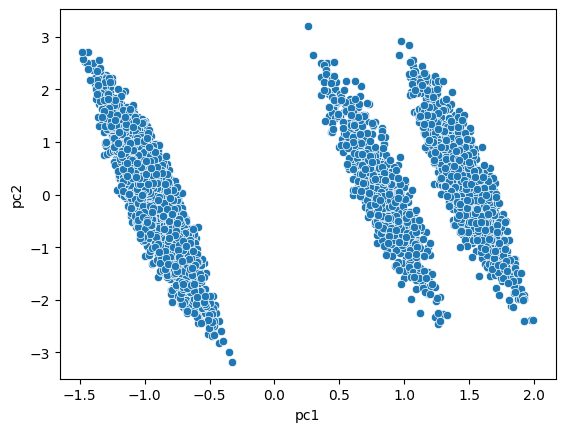

In [ ]:
pca_viz = PCA(n_components=2).fit_transform(preproc)
pca_viz_coords = pd.DataFrame(pca_viz, columns=['pc1', 'pc2'])
sns.scatterplot(data=pca_viz_coords, x='pc1', y='pc2')

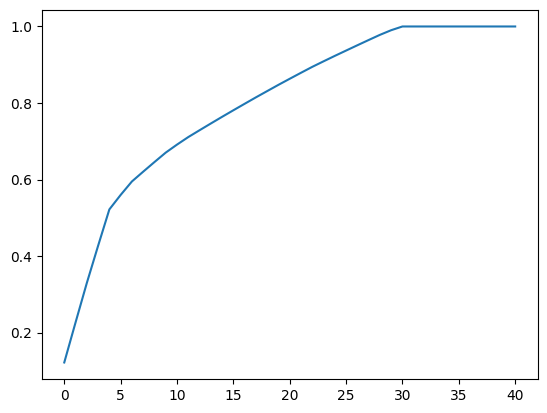

In [ ]:
pca = PCA()
dim_red = pca.fit_transform(preproc)
total_var_exp = np.cumsum(pca.explained_variance_ratio_)
plt.plot(total_var_exp)

best_num_pcs = np.where(total_var_exp >= 0.8)[0][0]

In [ ]:
# Gaussian Mixture Model Pipeline
pipe_gmm = Pipeline([('pca', PCA(n_components=best_num_pcs)), ('clustering', GaussianMixture())])

param_grid = {
    'clustering__n_components': range(2, 6),
    'clustering__covariance_type': ['full', 'tied', 'diag', 'spherical']
}

grid = GridSearchCV(
    estimator=pipe_gmm,
    param_grid=param_grid,
    scoring='adjusted_rand_score',
    verbose=1,
    cv=3
)

In [ ]:
grid.fit(preproc, gender_labels)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', PCA(n_components=17)),
                                       ('clustering', GaussianMixture())]),
             param_grid={'clustering__covariance_type': ['full', 'tied', 'diag',
                                                         'spherical'],
                         'clustering__n_components': range(2, 6)},
             scoring='adjusted_rand_score', verbose=1)

The reason we fit the data on the gender labels was because this produced the best ARI score. As we can see in the results below, the full model with 2 components, the diag model with 2 components, and the diag model with 3 components all produced the highest ARI score of around 0.33. A score of 0.33 indicates a decent clustering, but not ideal. It seems to be the most reasonable score relative to using other hyperparameters and target labels, but this indicates that GMM may not be the best approach to this particular problem.

In [ ]:
results = pd.DataFrame(grid.cv_results_['params'])
results['score'] = grid.cv_results_['mean_test_score']
cols = results.columns.to_series().str.split('__').apply(lambda x: x[-1])
results.columns = cols
results

,covariance_type,n_components,score
0,full,2,0.333225
1,full,3,0.000000
2,full,4,0.000000
3,full,5,0.001744
4,tied,2,0.000000
5,tied,3,0.000000
6,tied,4,-0.000779
7,tied,5,-0.000060
8,diag,2,0.333333
9,diag,3,0.000000


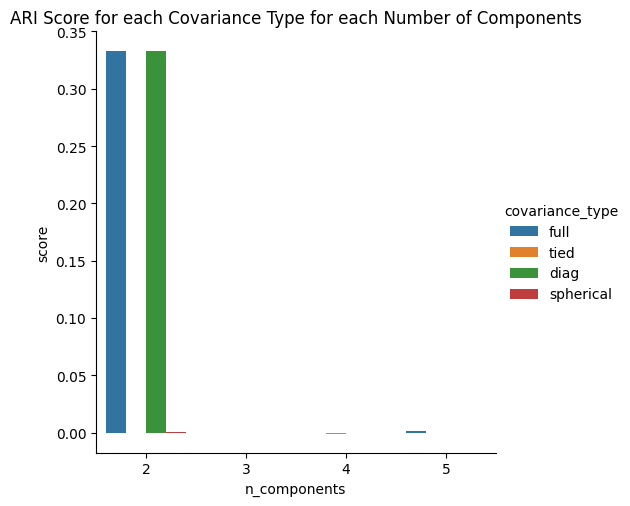

In [ ]:
sns.catplot(
    data=results,
    kind="bar",
    x="n_components",
    y="score",
    hue="covariance_type",
)

plt.title('ARI Score for each Covariance Type for each Number of Components')
plt.show()

In [ ]:
gmm_pred = pd.DataFrame({'true':gender_labels, 'pred':grid.predict(preproc)})

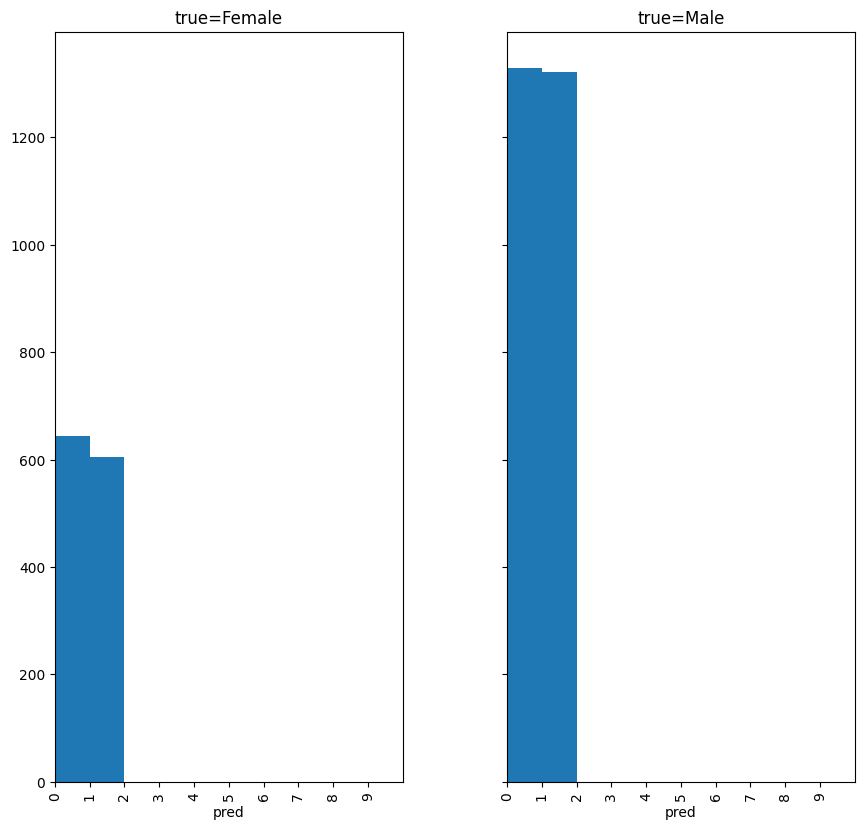

In [ ]:
axs=gmm_pred.hist(column='pred',by='true',sharey=True, figsize=(10,10), bins=range(11));
for ax in axs.ravel():
    ax.set_xlim((0,10))
    ax.set_xticks(range(10))
    old=ax.get_title()
    ax.set_title('true='+old)
    ax.set_xlabel('pred')

# Discussion

### Interpreting the result

For this dataset, GMM provided evidence for being the best model out of the three that were tested. This means that if a business would like to segment their customers, GMM with diagonal and full covariance with 2 components would provide the best model. Not only this, but it was also found that gender provides the best variable to segment customers as suggested by the adjusted rand index. Furthermore, DBSCAN had decent results while KMeans did very poorly. The nature of data can explain this.


### Limitations

After exploring the data, it is was clear that some other models would be worth exploring. As shown, KMeans performed poorly considering the nature of the data. Because of this, some models worth trying would be spectral clustering and hierarchical clustering. These would be models to be explored because the data fulfills the requirements.

### Ethics & Privacy

Since the data that we plan on using is public domain, we aren't too worried about data privacy especially since there aren't any names attached to the data points. However, we are fully aware that dealing with personal data (especially finance data) comes with many laws and regulations that are in place in order to maintain personal privacy.

However, one crucial privacy/ethical concern that we must take into account is bias in the data. We are aware that the process of data collection and manipulation can lead to unfair or discriminatory outcomes, which is why we need to wholly and accurately represent diverse demographic groups, and regularly evaluate model performance across different clusters.

### Conclusion

In conclusion, we found that none of our clustering algorithms worked well on this dataset. We intended to be able to create clusters by 3 target labels (gender, category, payment method), and see which clusters would be the best based off of scoring metrics like Adjusted Rand Index and Silhouette Score. Our Gaussian Mixture Model with 2 components and full covariance, as well as our one with 2 components and diag covariance seemed to perform the best relatively on the gender labels, with an ARI score of 0.33. But the model still wasn't the best way to cluster the dataset. Other clustering algorithms such as Hierarchical clustering and Spectral clustering may be more suitable for this dataset. However, we learned a handful of useful topics in regards to unsupervised learning that we plan to implement in the future.

# Footnotes

1.^: Radu, V. (2 Feb 2024) Consumer Behavior in Marketing. Patterns, Types & Segmentation. Omniconvert. https://www.omniconvert.com/blog/consumer-behavior-in-marketing-patterns-types-segmentation/

2.^: Statista. Shopping Behavior. Statista. https://www.statista.com/markets/423/topic/536/shopping-behavior/#overview

3.^: Solver, Z. (Nov 2023) Consumer Behavior and Shopping Habits Dataset. Kaggle. https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset/data

4.^: Customer Segmentation: Unsupervised Machine Learning Algorithms In Python. https://towardsdatascience.com/customer-segmentation-unsupervised-machine-learning-algorithms-in-python-3ae4d6cfd41d
